In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')


In [2]:
data= pd.read_csv('index.csv')
data.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [4]:
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


## Data Cleaning

In [6]:
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data['card'].describe()

count                    1044
unique                    446
top       ANON-0000-0000-0012
freq                       88
Name: card, dtype: object

In [9]:
data[data['card'].isnull()]['cash_type'].value_counts()

cash_type
cash    89
Name: count, dtype: int64

In [10]:
# filling the missing values
data['card'].fillna(data['card'].mode()[0], inplace=True)

In [11]:
data.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [12]:
# Convert Date to datetime type
data['date'] = pd.to_datetime(data['date'])
# Convert Date to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])
data.dtypes #checking the datatype

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [13]:
#creating column of month, week and hour
data['month']=data['date'].dt.strftime('%Y-%m')
data['week']=data['date'].dt.strftime('%m')
data['hour']=data['datetime'].dt.strftime('%H')


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   week         1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [15]:
data.head()

,date,datetime,cash_type,card,money,coffee_name,month,week,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,03,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,03,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,03,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,03,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,03,13


## Payment Type

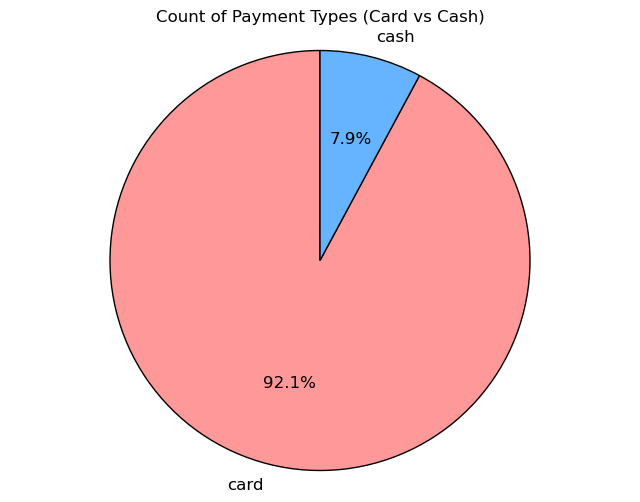

In [17]:
# Count occurrences of each 'cash_type'
cash_type_counts = data['cash_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,6))
plt.pie(cash_type_counts.values, 
        labels=cash_type_counts.index,   # Define labels and sizes for the pie chart
        autopct='%1.1f%%',
        startangle=90,
        colors=['#FF9999', '#66B3FF'],
        
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})

plt.title('Count of Payment Types (Card vs Cash)')
plt.axis('equal')
plt.show()


* 92.1% of the transactions are from card users and 7.9% from cash users

## Most Popular Coffee

In [20]:
# Aggregate total sales for each coffee name
most_sold_coffee = data.groupby('coffee_name')['money'].sum().reset_index()

# Sort the results in descending order based on the 'money' column
most_sold_coffee = most_sold_coffee.sort_values('money', ascending=False)


<function matplotlib.pyplot.show(close=None, block=None)>

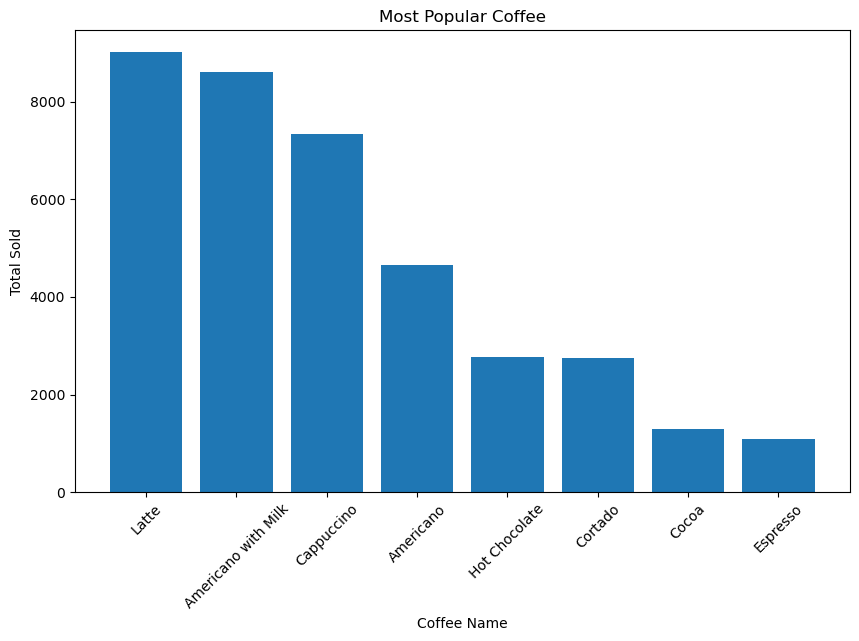

In [21]:
#create bar plot
plt.figure(figsize=(10,6))
plt.bar(most_sold_coffee['coffee_name'], most_sold_coffee['money'])
plt.title('Most Popular Coffee')
plt.xlabel('Coffee Name')
plt.ylabel('Total Sold')
plt.xticks(rotation=45) 
plt.show

* Latte and Americano with milk are the most popular coffee products

## Revenue Genrated by Each Coffee

In [24]:
# Aggregate total revenue for each coffee name
revenue_per_coffee=data.groupby('coffee_name')['money'].sum().reset_index()
# Sort the results in descending order based on the revenue
revenue_per_coffee=revenue_per_coffee.sort_values(by='money', ascending=False)

Text(0.5, 0, 'Revenue')

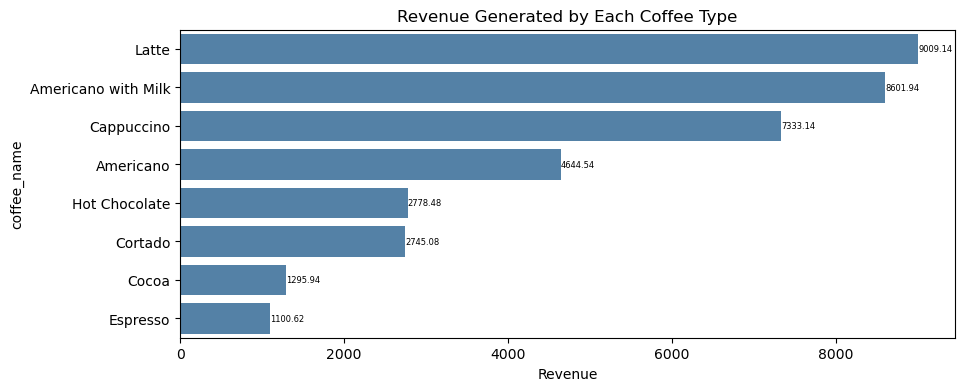

In [25]:
#create bar plot
plt.figure(figsize=(10,4))
ax = sns.barplot(data=revenue_per_coffee,x='money',y='coffee_name',color='steelblue')
ax.bar_label(ax.containers[0], fontsize=6)
plt.title('Revenue Generated by Each Coffee Type')

plt.xlabel('Revenue')

* Latte is has genrated highest revenue of 9009.14 dollars and Espresso is the one with lowest revenue 1100.62 dollars

## Monthly Sales

In [28]:
# Aggregate total sales by month
monthly_sales = data.groupby('month')['money'].sum().reset_index()

Text(0.5, 0, 'Month')

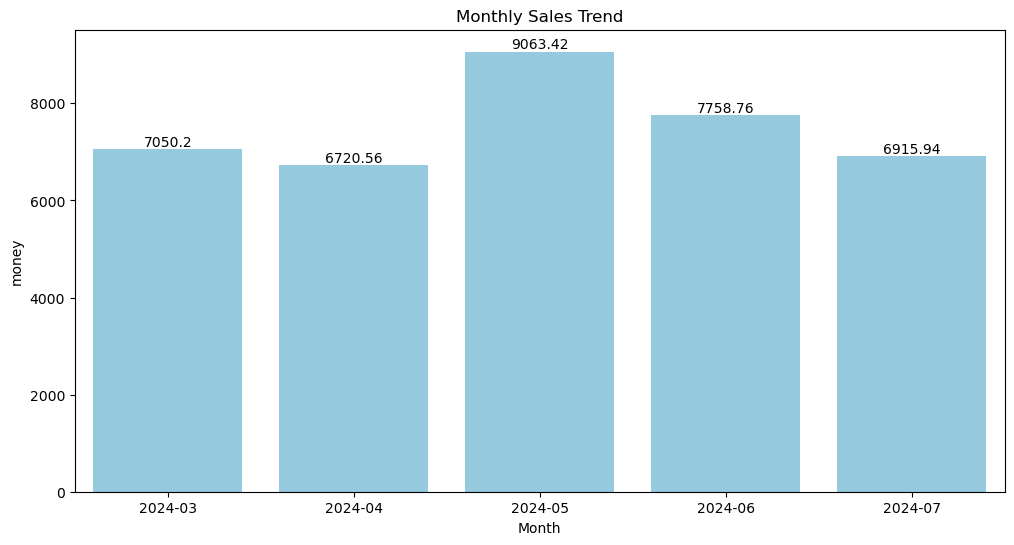

In [29]:
# Plotting the monthly sales
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=monthly_sales, x='month', y='money', color='skyblue')

# Adding sales labels on the bars
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')

## Weekly Sales

In [57]:
data['week'] = data['date'].dt.day_name()

# Filter data for the specific week
start_date = '2024-03-01'  # Start date of the week
end_date = '2024-03-07'    # End date of the week
one_week_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Aggregate sales by weekday
weekly_sales = one_week_data.groupby('week')['money'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

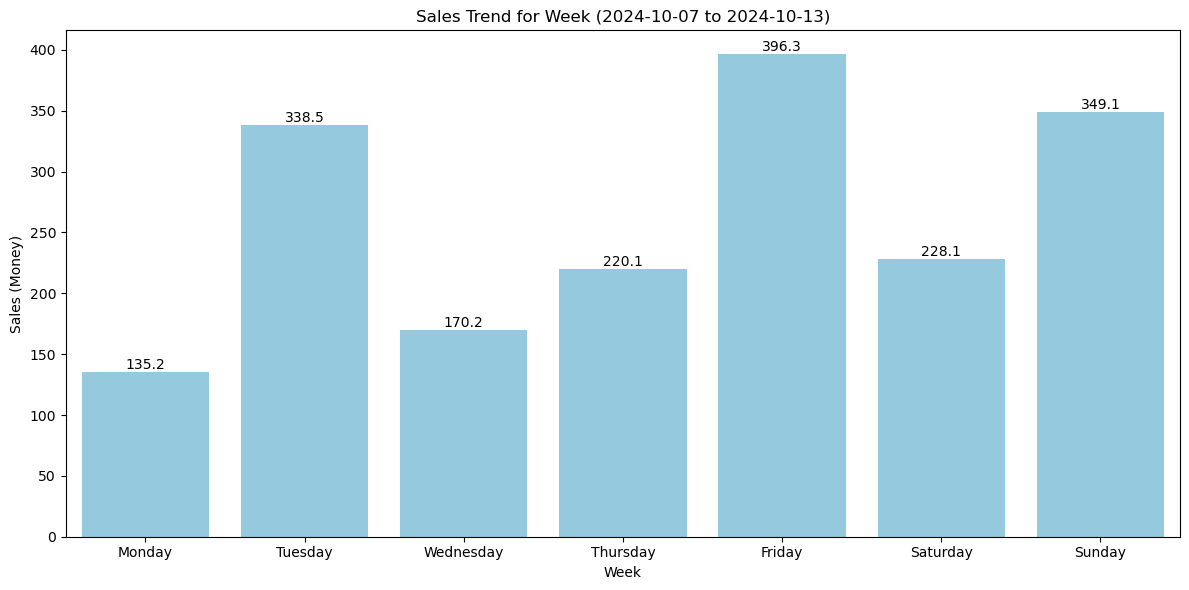

In [59]:

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=weekly_sales, x='week', y='money', color='skyblue')

# Adding sales labels on the bars
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Sales Trend for Week (2024-10-07 to 2024-10-13)')
plt.xlabel('Week')
plt.ylabel('Sales (Money)')
plt.tight_layout()

plt.show()


## Hourly Sales 

In [61]:
# Aggregate total sales by month
hourly_sales = data.groupby('hour')['money'].sum().reset_index()

Text(0.5, 0, 'Hour')

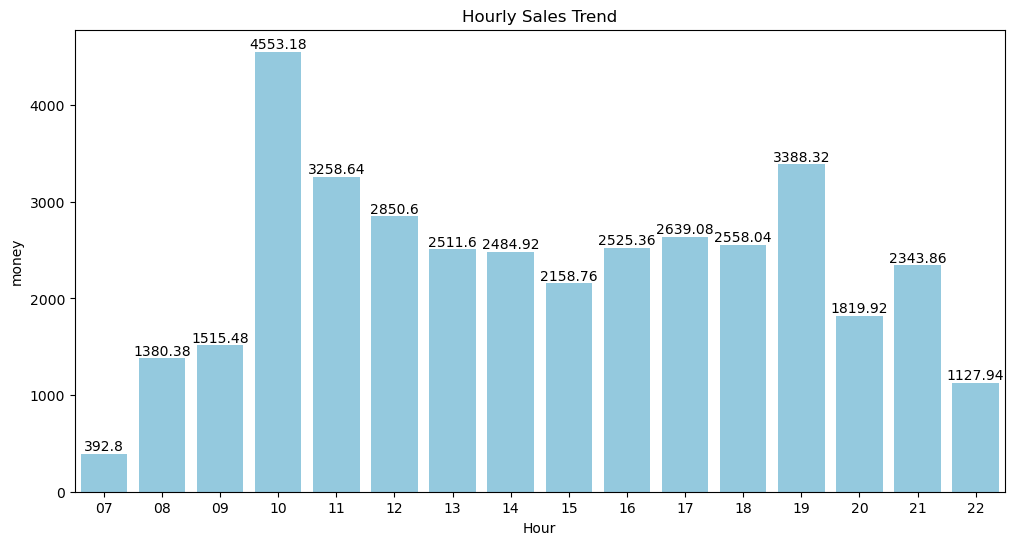

In [63]:
# Plotting the monthly sales
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=hourly_sales, x='hour', y='money', color='skyblue')

# Adding sales labels on the bars
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Hourly Sales Trend')
plt.xlabel('Hour')

## Hourly Sale of each Coffee

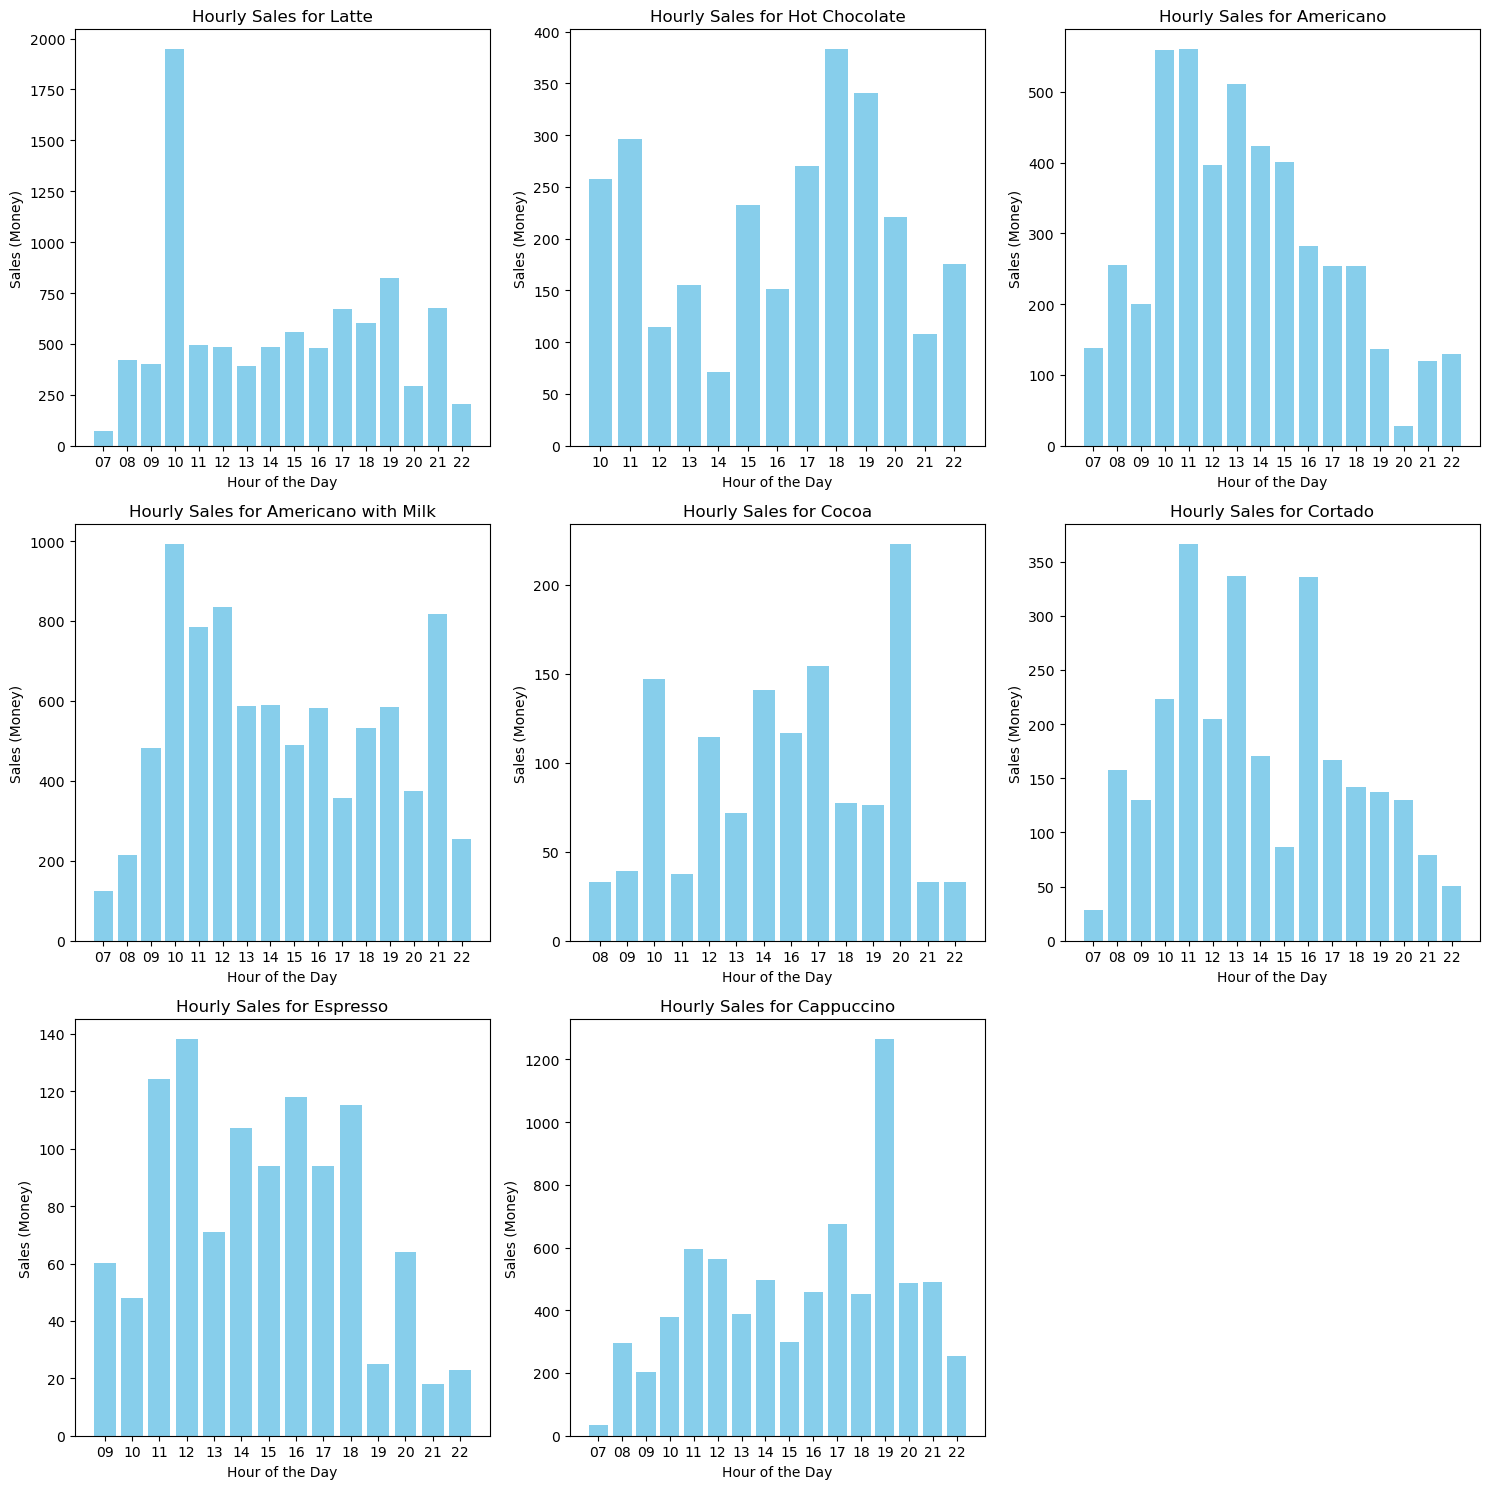

In [39]:

unique_coffees = data['coffee_name'].unique()

# Define the number of rows and columns for subplots (adjustable based on coffee types)
num_coffees = len(unique_coffees)
cols = 3  
rows = (num_coffees + cols - 1) // cols  

# Set up the figure size based on number of subplots
plt.figure(figsize=(15, 5 * rows))

# Loop through each coffee type and create a barplot for each
for i, coffee in enumerate(unique_coffees):
    coffee_data = data[data['coffee_name'] == coffee]
    hourly_sales = coffee_data.groupby('hour')['money'].sum()
    
    plt.subplot(rows, cols, i + 1)
    plt.bar(hourly_sales.index, hourly_sales.values, color='skyblue')
    plt.title(f'Hourly Sales for {coffee}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Sales (Money)')
plt.tight_layout()
plt.show()

 